# Test d1s1 customized with FGBuster

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from fgbuster.observation_helpers import *
from fgbuster.separation_recipes import basic_comp_sep
from fgbuster.component_model import CMB, Dust, Synchrotron

from micmac import get_observation_customized, d1s1_sky_customized

In [2]:
nside_map = 64
nside_spv_map = 1
nside_spv_patches = 1
noise_seed = 42
instr_name = 'LiteBIRD'
mask_path = '/Users/arizzieri/APC/PhD/cmb_work/common/masks/HFI_Mask_GalPlane-apo0_2048_R2.00.fits'

In [3]:
instrument = get_instrument(instr_name)

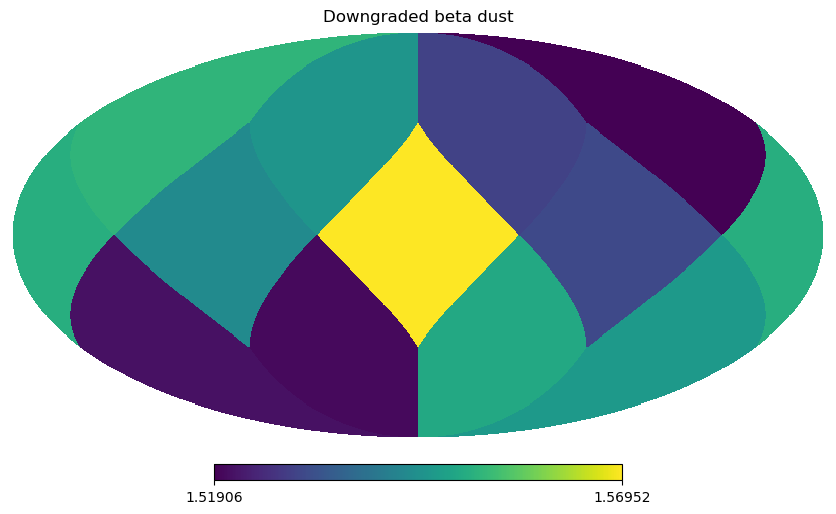

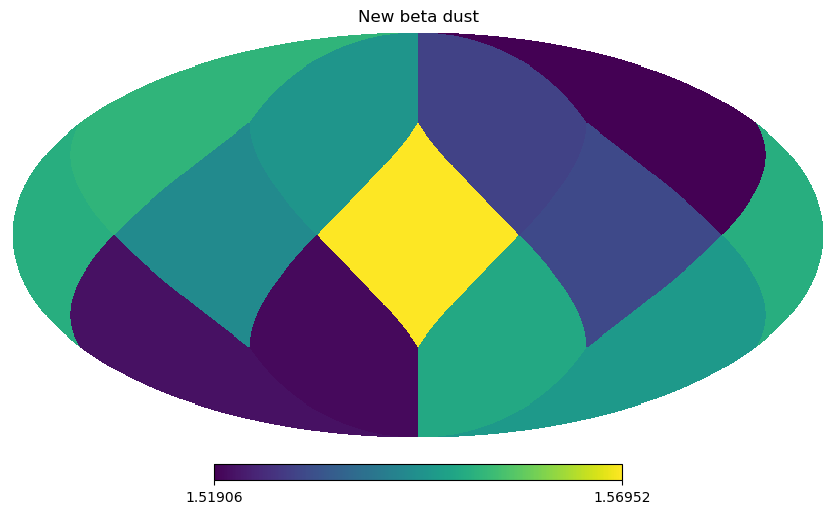

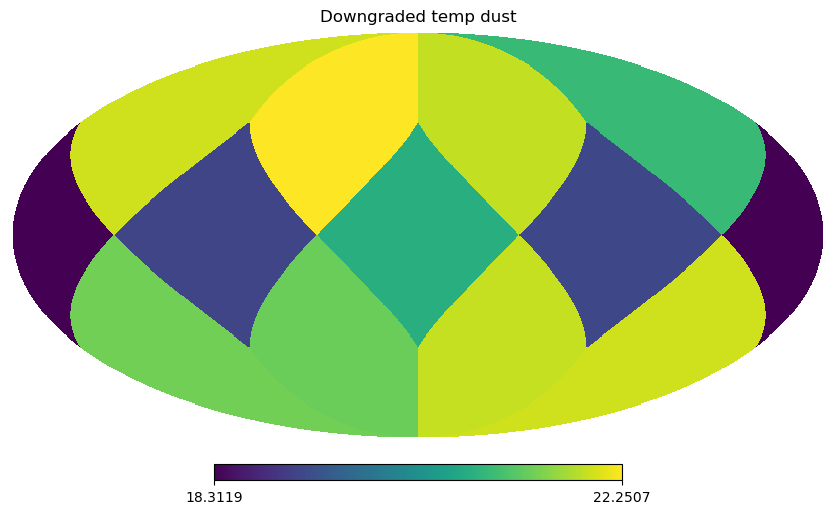

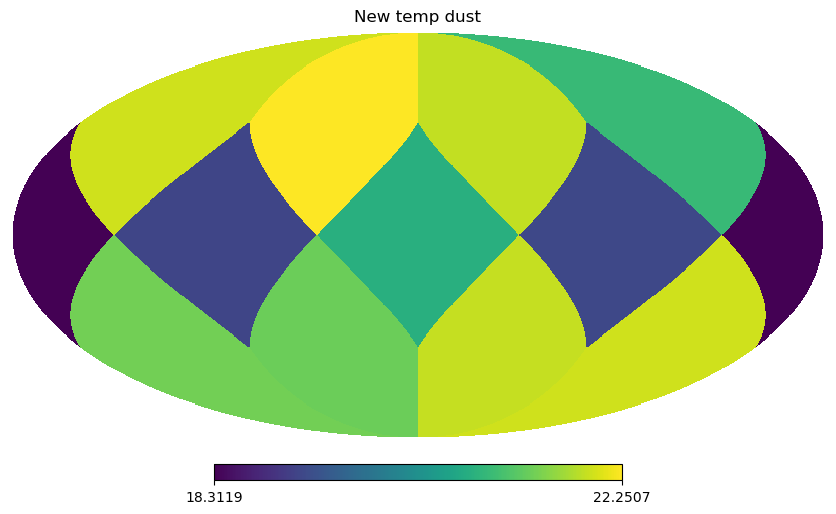

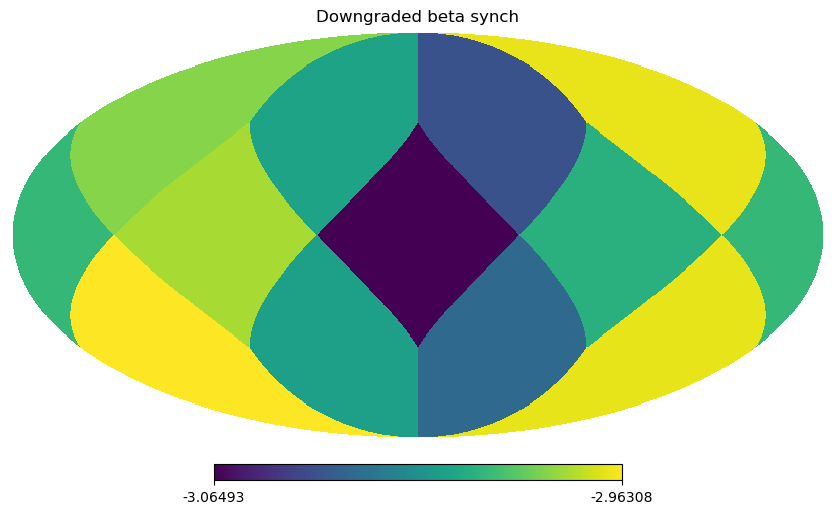

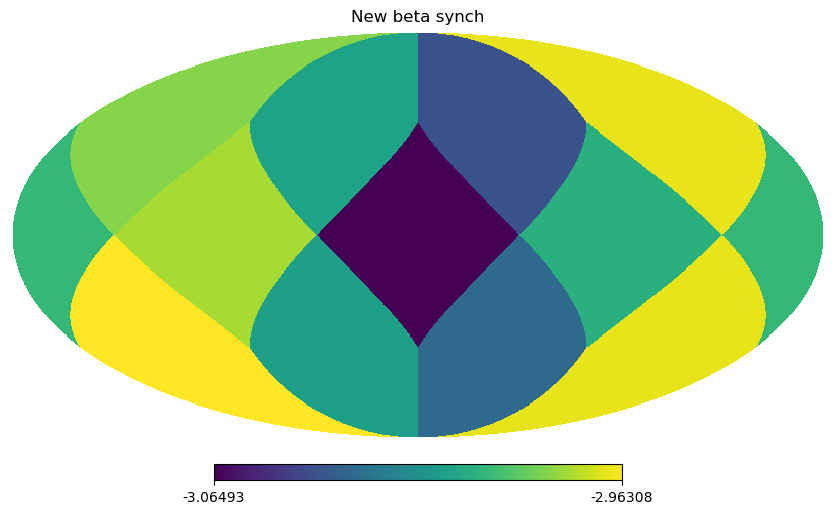

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
# get input freq maps customized with less spv of SEDs
np.random.seed(noise_seed)
my_sky = d1s1_sky_customized(nside_map, nside_spv_map)    #TODO: this could be done better with nside_spv passed in params file
freq_maps_fgs_denoised = get_observation_customized(instrument, my_sky, nside=nside_map, noise=False)[:, 1:, :]   # keep only Q and U
np.random.seed(noise_seed)
noise_map = get_noise_realization(nside_map, instrument)[:, 1:, :]
freq_maps = freq_maps_fgs_denoised + noise_map

In [5]:
# add mask
mask_ = hp.read_map(mask_path, field=2, dtype=np.float64)
mask = hp.ud_grade(mask_, nside_out=nside_map)
freq_maps[..., mask == 0] = hp.UNSEEN

In [6]:
stokes_lab = ['Q', 'U']
components = [CMB(), Dust(nu0=100.), Synchrotron(nu0=100.)]
comp_lab = ['res', 'dust', 'sync']

In [7]:
# comp sep
result = basic_comp_sep(components, instrument, freq_maps, nside=1)

(array([ 1.54, 20.  , -3.  ]),)
(array([ 1.54, 20.  , -3.  ]),)


/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)
/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


(array([ 1.54, 20.  , -3.  ]),)
(array([ 1.54, 20.  , -3.  ]),)


/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)
/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


(array([ 1.54, 20.  , -3.  ]),)
(array([ 1.54, 20.  , -3.  ]),)
(array([ 1.54, 20.  , -3.  ]),)


/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


(array([ 1.54, 20.  , -3.  ]),)


/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


(array([ 1.54, 20.  , -3.  ]),)


/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


(array([ 1.54, 20.  , -3.  ]),)
(array([ 1.54, 20.  , -3.  ]),)
(array([ 1.54, 20.  , -3.  ]),)


/Users/arizzieri/anaconda3/envs/micmac_env/lib/python3.9/site-packages/fgbuster/algebra.py:993: RuntimeWarning: invalid value encountered in divide
  res.chi_dB.append(np.sum(res.chi * As_dB_i, -1)


In [8]:
# explore the results
result.x

array([[ 1.54898172,  1.56287707,  1.52010333,  1.53375504,  1.56101128,
         1.55579718,  1.573707  ,  1.54216556,  1.52716506,  1.52176128,
         1.52638694,  1.54826957],
       [22.12691891, 21.51512597, 21.00153542, 21.70326334, 21.11725246,
        18.79310641, 17.63579832, 18.80309784, 21.0435485 , 21.40140725,
        23.02231419, 21.96917569],
       [-2.99955531, -3.0042687 , -2.98781286, -3.02846788, -3.05000247,
        -2.97338461, -3.00602309, -3.01070461, -2.97418064, -2.95085603,
        -2.92716986, -3.03411343]])

In [9]:
np.shape(result.s)

(3, 2, 49152)

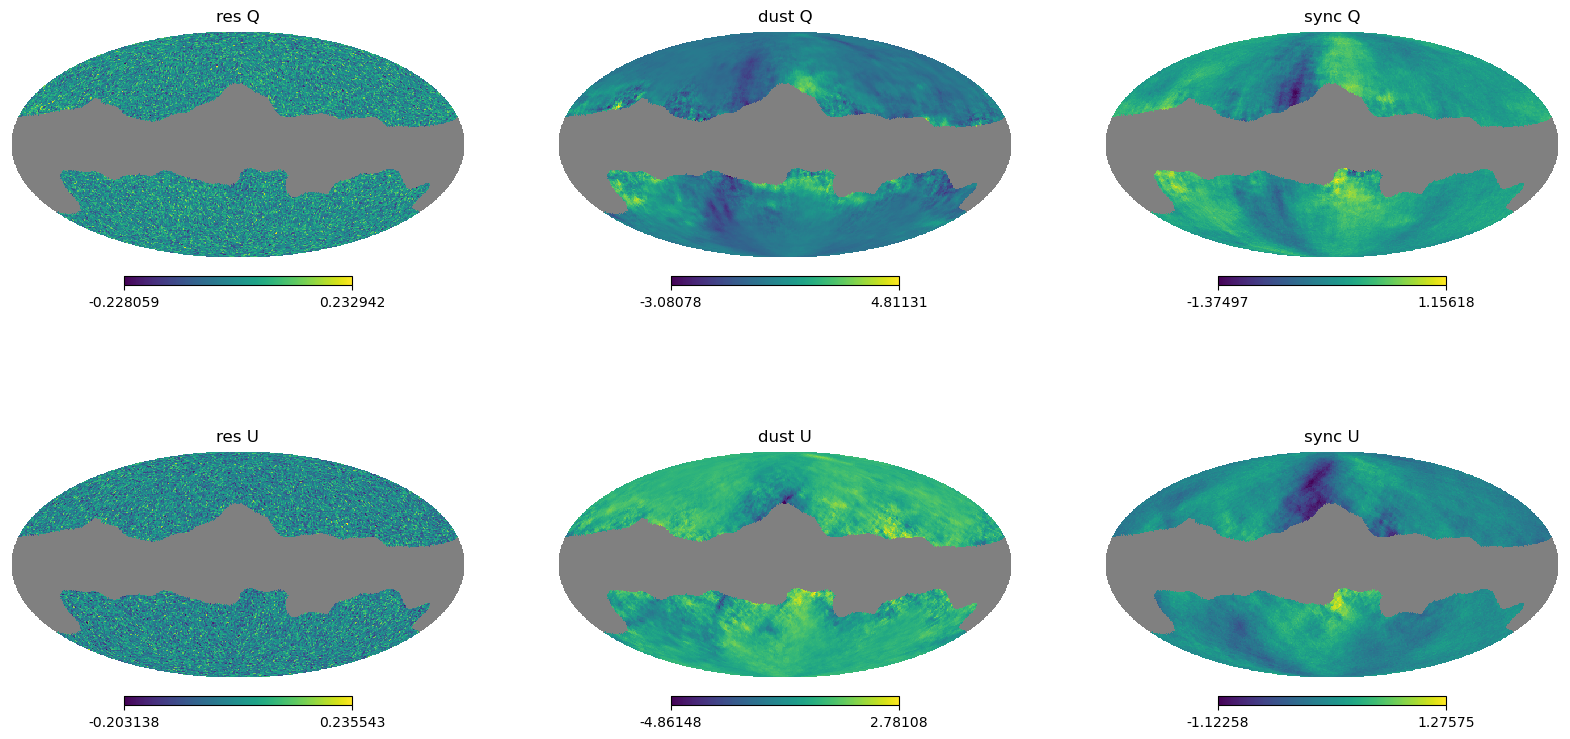

In [10]:
fig, ax = plt.subplots(2, 3, figsize=[20., 10.])
for i in range(np.shape(result.s)[0]):
    for j in range(np.shape(result.s)[1]):
        lab = comp_lab[i] + ' ' + stokes_lab[j]
        plt.axes(ax[j][i])
        hp.mollview(result.s[i, j], hold=True, title=lab)
plt.show()